In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import pickle

sns.set_style('white')
%matplotlib inline

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['font.weight'] = 'bold'

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#Color scheme
pal = sns.cubehelix_palette(20, rot=-.25, light=0.7)

In [2]:
df_rel_sort_list = pickle.load(open('pickle_files/rel_sort_lod_list.pkl', 'rb'))
df_abs_sort_list = pickle.load(open('pickle_files/abs_sort_lod_list.pkl', 'rb'))

df_pseudo_rel_sort_list = pickle.load(open('pickle_files/pseudo_rel_sort_lod_list.pkl', 'rb'))
df_pseudo_abs_sort_list = pickle.load(open('pickle_files/pseudo_abs_sort_lod_list.pkl', 'rb'))

df_col_names_list = pickle.load(open('pickle_files/col_names_lod_list.pkl', 'rb'))
df_metadata = pickle.load(open('pickle_files/metadata_comp_aerobicity.pkl', 'rb'))

### Generate binary metadata columns for presence/absence of various taxa at 1e4 threshold

In [3]:
clostridia_list = []
entero_list = []
lacto_list = []
ecoli_list = []
campy_list = []
enterococcus_list = []
aeromonas_list = []
romboutsia_list = []
providencia_list = []
prevotella_list = []

for index in df_metadata.index.tolist():
    if index in df_abs_sort_list[4].index.tolist():
        if df_abs_sort_list[4].loc[index, 'ASV30']>1e4:
            prevotella=1
        else:
            prevotella=0
        
        if df_abs_sort_list[4].loc[index, 'ASV81']>1e4:
            clostridia = 1
        else:
            clostridia = 0
        
        if df_abs_sort_list[4].loc[index, 'ASV255']>1e4:
            entero = 1
        else:
            entero = 0
        
        if df_abs_sort_list[4].loc[index, 'ASV71']>1e4:
            lacto = 1
        else:
            lacto = 0
            
        if df_abs_sort_list[4].loc[index, 'ASV247']>1e4:
            ecoli = 1
        else:
            ecoli = 0
            
        if df_abs_sort_list[4].loc[index, 'ASV57']>1e4:
            campy = 1
        else:
            campy = 0
            
        if df_abs_sort_list[4].loc[index, 'ASV70']>1e4:
            enterococcus = 1
        else:
            enterococcus = 0
            
        if df_abs_sort_list[4].loc[index, 'ASV142']>1e4:
            romboutsia = 1
        else:
            romboutsia = 0
            
        if df_abs_sort_list[4].loc[index, 'ASV219']>1e4:
            aeromonas = 1
        else:
            aeromonas = 0
            
        if df_abs_sort_list[4].loc[index, 'ASV253']>1e4:
            providencia = 1
        else:
            providencia = 0
        
        clostridia_list.append(clostridia)
        entero_list.append(entero)
        lacto_list.append(lacto)
        ecoli_list.append(ecoli)
        campy_list.append(campy)
        enterococcus_list.append(enterococcus)
        romboutsia_list.append(romboutsia)
        aeromonas_list.append(aeromonas)
        providencia_list.append(providencia)
        prevotella_list.append(prevotella)

df_metadata['Clostridia'] = clostridia_list
df_metadata['Entero'] = entero_list
df_metadata['Lacto'] = lacto_list
df_metadata['Ecoli'] = ecoli_list
df_metadata['Campy'] = campy_list
df_metadata['Enterococcus'] = enterococcus_list
df_metadata['Romboutsia'] = romboutsia_list
df_metadata['Aeromonas'] = aeromonas_list
df_metadata['Providencia'] = providencia_list
df_metadata['Prevotella'] = prevotella_list

In [31]:
# Create column for the number of disruptor taxa in each sample
df_metadata['disruptor count'] = df_metadata[['Entero', 'Ecoli', 'Clostridia', 'Enterococcus', 'Romboutsia', 'Aeromonas', 'Providencia']].sum(axis=1)

# Create column for the sum of all disruptor taxa in each sample
df_metadata = df_metadata.merge(pd.DataFrame(np.log10(df_abs_sort_list[4][['ASV81', 'ASV255', 'ASV247', 'ASV70', 'ASV142', 'ASV219', 'ASV253']].sum(axis=1)+1)), left_index=True, right_index=True).rename(columns={0:'disruptor sum'})

# Create column for the percent of all disruptor taxa in each sample
df_metadata['disruptor percent'] = (10**df_metadata['disruptor sum'])/df_metadata['Copies/mL']*100

# Create column for the sum of Lactobacillus in each sample
df_metadata['Lacto sum'] = np.log10(df_abs_sort_list[4]['ASV71']+1)

(2, 9.3)

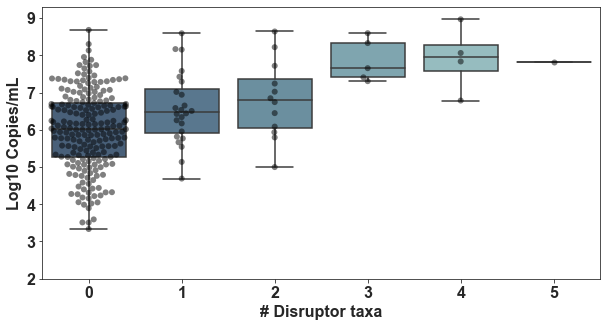

In [32]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

sns.boxplot(ax=ax1, x='disruptor count', y='Log Copies/mL', data=df_metadata, palette=[pal[12], pal[9], pal[6], pal[3], pal[0]])
sns.swarmplot(ax=ax1, x='disruptor count', y='Log Copies/mL', data=df_metadata, s=6, color='k', alpha=0.5)

ax1.set_ylabel('Log10 Copies/mL', fontsize=16, fontweight='bold')
ax1.set_xlabel('# Disruptor taxa', fontsize=16, fontweight='bold')
ax1.set_ylim(2,9.3)
#fig.savefig('total_vs_disruptor_count.png', bbox_inches='tight', dpi=200)
#fig.savefig('total_vs_disruptor_count.pdf', bbox_inches='tight', transparent=True)

### Relationship between clostridia and serum IL8

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'No Clostridia'), Text(0, 0, 'Clostridia')]

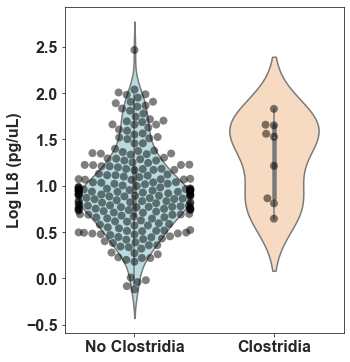

In [33]:
df_metadata['Log IL8'] = np.log10(df_metadata['IL8'])

fig = plt.figure(figsize=(5,6))
ax1 = fig.add_subplot(111)

sns.violinplot(ax=ax1, x='Clostridia', y='Log IL8', data=df_metadata, palette=['powderblue', 'peachpuff'])
sns.swarmplot(ax=ax1, x='Clostridia', y='Log IL8', data=df_metadata, color='k', alpha=0.5, s=8)

ax1.set_ylabel('Log IL8 (pg/uL)', fontsize=16, fontweight='bold')
ax1.set_xlabel('')
ax1.set_xticklabels(['No Clostridia', 'Clostridia'])

#fig.savefig('IL8_Clostridia_Entero.png', bbox_inches='tight', dpi=200)
#fig.savefig('IL8_Clostridia_Entero.pdf', bbox_inches='tight')

### Statistical comparison between IL8 expression in samples containing a specific disruptor vs not

In [34]:
print('Clostridia: ' + str(stats.kruskal(df_metadata[df_metadata['Clostridia']==0]['IL8'], df_metadata[df_metadata['Clostridia']==1]['IL8'], nan_policy='omit')))
print('Escherichia-Shigella: ' + str(stats.kruskal(df_metadata[df_metadata['Ecoli']==0]['IL8'], df_metadata[df_metadata['Ecoli']==1]['IL8'], nan_policy='omit')))
print('Enterobacteriaceae: ' + str(stats.kruskal(df_metadata[df_metadata['Entero']==0]['IL8'], df_metadata[df_metadata['Entero']==1]['IL8'], nan_policy='omit')))
print('Enterococcus: ' + str(stats.kruskal(df_metadata[df_metadata['Enterococcus']==0]['IL8'], df_metadata[df_metadata['Enterococcus']==1]['IL8'], nan_policy='omit')))
print('Lactobacillus: ' + str(stats.kruskal(df_metadata[df_metadata['Lacto']==0]['IL8'], df_metadata[df_metadata['Lacto']==1]['IL8'], nan_policy='omit')))

Clostridia: KruskalResult(statistic=4.261226698861622, pvalue=0.03899175501522481)
Escherichia-Shigella: KruskalResult(statistic=1.0763592657783316, pvalue=0.29951344310793293)
Enterobacteriaceae: KruskalResult(statistic=2.59746931301721, pvalue=0.10703450385014338)
Enterococcus: KruskalResult(statistic=0.11045159526157278, pvalue=0.7396305856849377)
Lactobacillus: KruskalResult(statistic=3.6964049905227343, pvalue=0.05452983888122768)


### Relationship between disruptor relative and absolute abundance

Text(0.5, 0, 'Disruptor Absolute Abundance (Log10 Copies/mL)')

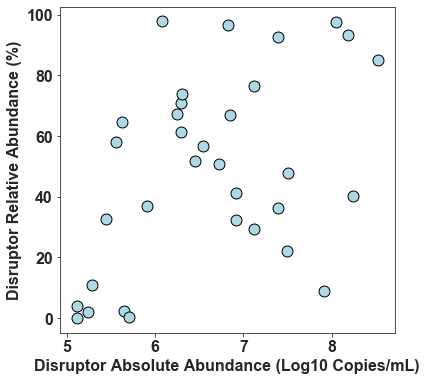

In [35]:
_df = df_metadata[(df_metadata['disruptor sum']>5)].sort_values('disruptor sum')[['disruptor sum', 'disruptor percent']]

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

sns.scatterplot(ax=ax1, x='disruptor sum', y='disruptor percent', data=_df, s=120, color='lightblue', edgecolor='k', linewidth=1)
ax1.set_ylabel('Disruptor Relative Abundance (%)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Disruptor Absolute Abundance (Log10 Copies/mL)', fontsize=16, fontweight='bold')
#fig.savefig('relative_absolute.png', bbox_inches='tight', dpi=200)
#fig.savefig('relative_absolute.pdf', bbox_inches='tight')

### Relationship between disruptor load and number of severe symptoms

In [36]:
# Sum the number of severe symptoms in each individual
df_metadata['all symptom count (50th)'] = df_metadata[['constipation>50th', 'bloating>50th', 'excess_gas>50th', 'incomplete_evac>50th', 'diarrhea>50th', 'urgency>50th']].sum(axis=1, min_count=1)

In [37]:
# Disruptor load = 0
pd.DataFrame(df_metadata[df_metadata['disruptor sum']==0]['all symptom count (50th)'].value_counts(normalize=True)).sort_index()

all symptom count (50th)
0.0                  0.228758
1.0                  0.084967
2.0                  0.111111
3.0                  0.163399
4.0                  0.111111
5.0                  0.130719
6.0                  0.169935

In [38]:
# Disruptor load > 1e4
pd.DataFrame(df_metadata[df_metadata['disruptor sum']>4]['all symptom count (50th)'].value_counts(normalize=True)).sort_index()

all symptom count (50th)
0.0                  0.139535
1.0                  0.069767
2.0                  0.162791
3.0                  0.139535
4.0                  0.093023
5.0                  0.232558
6.0                  0.162791

In [39]:
# Disruptor load > 1e5
pd.DataFrame(df_metadata[df_metadata['disruptor sum']>5]['all symptom count (50th)'].value_counts(normalize=True)).sort_index()

all symptom count (50th)
0.0                  0.066667
1.0                  0.066667
2.0                  0.166667
3.0                  0.166667
4.0                  0.100000
5.0                  0.266667
6.0                  0.166667

In [40]:
# Disruptor load > 1e6
pd.DataFrame(df_metadata[df_metadata['disruptor sum']>6]['all symptom count (50th)'].value_counts(normalize=True)).sort_index()

all symptom count (50th)
0.0                  0.095238
1.0                  0.047619
2.0                  0.142857
3.0                  0.238095
4.0                  0.095238
5.0                  0.190476
6.0                  0.190476

In [41]:
# Disruptor load > 1e7
pd.DataFrame(df_metadata[df_metadata['disruptor sum']>7]['all symptom count (50th)'].value_counts(normalize=True)).sort_index()

all symptom count (50th)
2.0                       0.2
3.0                       0.1
4.0                       0.1
5.0                       0.3
6.0                       0.3

In [42]:
# Create a dataframe with the values from the above tables. Using either the zero symptom or sum of 5/6 symptom percents.

df = pd.DataFrame()

df['Percent'] = [23, 14, 6.7, 9.5, 0]+[30, 39, 43.4, 38, 60]
df['Score'] = ['No symptoms']*5 + ['5 or 6 symptoms']*5
df['Group'] = ['Disruptor Load = 0', 'Disruptor Load > 1e4', 'Disruptor Load > 1e5', 'Disruptor Load > 1e6', 'Disruptor Load > 1e7']*2

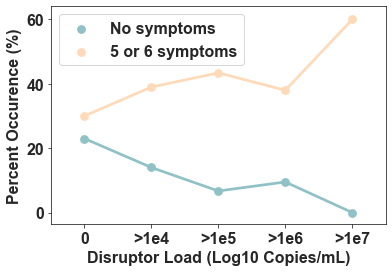

In [43]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
sns.pointplot(ax=ax1, x='Group', y='Percent', hue='Score', data=df, palette=[pal[0], 'PeachPuff'])
ax1.set_xticklabels(['0', '>1e4', '>1e5', '>1e6', '>1e7'])
ax1.set_xlabel('Disruptor Load (Log10 Copies/mL)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Percent Occurence (%)', fontsize=16, fontweight='bold')
ax1.legend(fontsize=16)
#fig.savefig('symptom_v_disruptorload_lineplot.png', bbox_inches='tight', dpi=200)
#fig.savefig('symptom_v_disruptorload_lineplot.pdf', bbox_inches='tight', transparent=True)

### Relationship between lactobacillus load and bloating symptoms in individuals with disruptor loads > 1e5

Text(0, 0.5, 'Bloating Score')

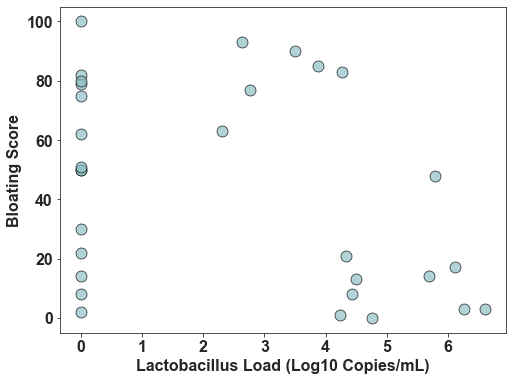

In [44]:
_df = pd.DataFrame(np.log10(df_abs_sort_list[4]['ASV71']+1)).merge(df_metadata[['Log Copies/mL', 'bloating_vas', 'disruptor sum']], left_index=True, right_index=True)
_df = _df[_df['disruptor sum']>5]
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

sns.scatterplot(ax=ax1, x='ASV71', y='bloating_vas', data=_df, s=120, color=pal[0], edgecolor='k', alpha=0.7)
ax1.set_xlabel('Lactobacillus Load (Log10 Copies/mL)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Bloating Score', fontsize=16, fontweight='bold')
#fig.savefig('Lacto vs Bloating.png', bbox_inches='tight', dpi=200)
#fig.savefig('Lacto vs Bloating.pdf', bbox_inches='tight')

### Enrichment of disruptor and campylobacter in high total load samples

In [45]:
ecdf_entero = df_metadata[df_metadata['Entero']==1]['Log Copies/mL'].tolist()
ecdf_ecoli = df_metadata[df_metadata['Ecoli']==1]['Log Copies/mL'].tolist()
ecdf_lacto = df_metadata[df_metadata['Lacto']==1]['Log Copies/mL'].tolist()
ecdf_campy = df_metadata[df_metadata['Campy']==1]['Log Copies/mL'].tolist()
ecdf_prevotella = df_metadata[df_metadata['Prevotella']==1]['Log Copies/mL'].tolist()
ecdf_total = df_metadata['Log Copies/mL'].tolist()

In [46]:
def ecdf_vals(data):
    """
    Compute `x` and `y` values for plotting an ECDF.
    
    Parameters
    ----------
    data : array_like
        Array of data to be plotted as an ECDF.
        
    Returns
    -------
    x : array
        `x` values for plotting
    y : array
        `y` values for plotting    
    """
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

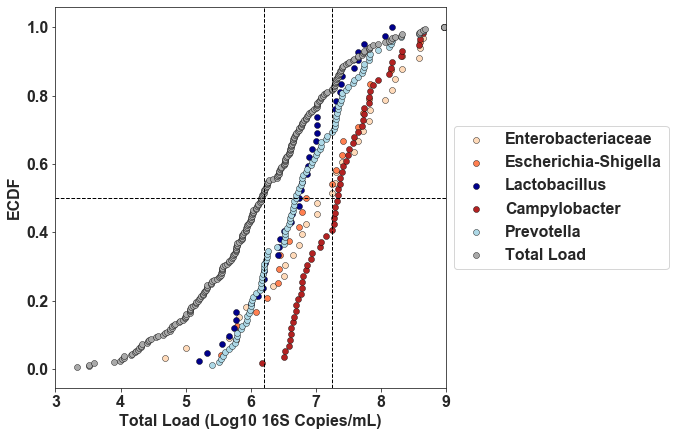

In [47]:
ecdf_x1, ecdf_y1 = ecdf_vals(ecdf_entero)
ecdf_x2, ecdf_y2 = ecdf_vals(ecdf_ecoli)
ecdf_x3, ecdf_y3 = ecdf_vals(ecdf_lacto)
ecdf_x4, ecdf_y4 = ecdf_vals(ecdf_campy)
ecdf_x6, ecdf_y6 = ecdf_vals(ecdf_prevotella)
ecdf_x7, ecdf_y7 = ecdf_vals(ecdf_total)

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.scatter(ecdf_x1, ecdf_y1, label="Enterobacteriaceae", color='peachpuff', edgecolor='k', linewidth=0.4)
ax1.scatter(ecdf_x2, ecdf_y2, label='Escherichia-Shigella', color='coral', edgecolor='k', linewidth=0.4)
ax1.scatter(ecdf_x3, ecdf_y3, label='Lactobacillus', color='darkblue', edgecolor='k', linewidth=0.4)
ax1.scatter(ecdf_x4, ecdf_y4, label='Campylobacter', color='firebrick', edgecolor='k', linewidth=0.4)
ax1.scatter(ecdf_x6, ecdf_y6, label='Prevotella', color='lightblue', edgecolor='k', linewidth=0.4)
ax1.scatter(ecdf_x7, ecdf_y7, label='Total Load', color='darkgrey', edgecolor='k', linewidth=0.4)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
ax1.set_xlabel('Total Load (Log10 16S Copies/mL)', fontsize=16, fontweight='bold')
ax1.set_ylabel('ECDF', fontsize=16, fontweight='bold')
ax1.set_xlim(3,9)
ax1.axhline(0.5, color='k', ls='--', linewidth=1)
ax1.axvline(6.2, color='k', ls='--', linewidth=1)
ax1.axvline(7.25, color='k', ls='--', linewidth=1)
#fig.savefig('ecdf.png', bbox_inches='tight', dpi=200)
#fig.savefig('ecdf.pdf', bbox_inches='tight')

In [48]:
df_metadata.to_pickle('pickle_files/metadata_comp_aerobicity_disruptor.pkl')

In [49]:
df_metadata['disruptor>-1'] = np.where(df_metadata['disruptor sum']>-1,1,0)
df_metadata['disruptor>0'] = np.where(df_metadata['disruptor sum']>0, 1, 0)
df_metadata['disruptor>1e4'] = np.where(df_metadata['disruptor sum']>4,1,0)
df_metadata['disruptor>1e5'] = np.where(df_metadata['disruptor sum']>5,1,0)
df_metadata['disruptor>1e9'] = np.where(df_metadata['disruptor sum']>9,1,0)

In [50]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [51]:
true_false_positive(df_metadata['disruptor>0'].tolist(), df_metadata['SIBO'].tolist())

(0.7758620689655172, 0.22395833333333334)

In [52]:
roc = np.array([])
for threshold in np.linspace(-0.2, 10, 100):
    threshold_vector = np.where(df_metadata['disruptor sum']<threshold, 0, 1).tolist()
    tpr, fpr = true_false_positive(threshold_vector, df_metadata['SIBO'].tolist())
    roc = np.append(roc, [fpr, tpr])
    
ROC = roc.reshape(-1,2)

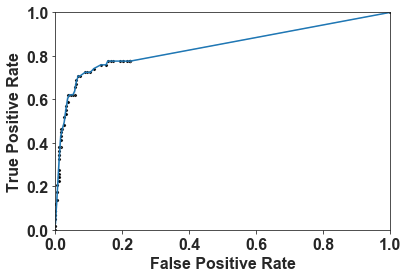

In [54]:
sns.lineplot(x=ROC[:,0],y=ROC[:,1])
sns.scatterplot(x=ROC[:,0],y=ROC[:,1], s=10, color='k')

plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Positive Rate', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=16, fontweight='bold')

#plt.savefig('roc.png', bbox_inches='tight', dpi=200)
#plt.savefig('roc.pdf', bbox_inches='tight', transparent=True)